# House Price Prediction

Kaggle Challange: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Algorithms:
- 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- 

The Description of every feature (column) can be found in the ```data_description.txt``` file.

```SalePrice``` is the target column in the data.


### Loading Data & Imports

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(os.path.join("data", "house_train.csv"))
test = pd.read_csv(os.path.join("data", "house_test.csv"))

In [3]:
data = pd.concat([train, test], axis=0)
data.drop(['Id'], axis = 1, inplace = True)

In [4]:
data.dtypes.value_counts()

object     43
int64      25
float64    12
dtype: int64

### Data Analysis & Visualization

Text(0.5, 1.0, 'Sale Price of the Houses')

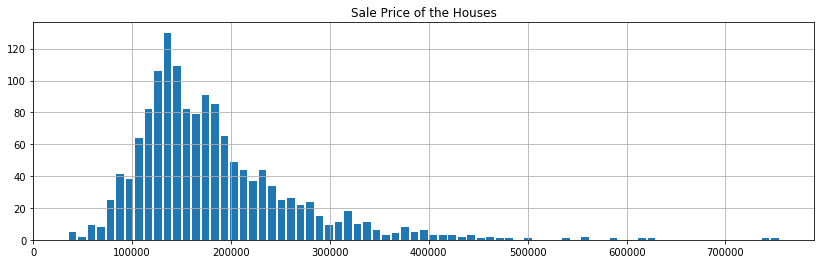

In [5]:
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('Sale Price of the Houses')

Text(0.5, 1.0, 'Year Built')

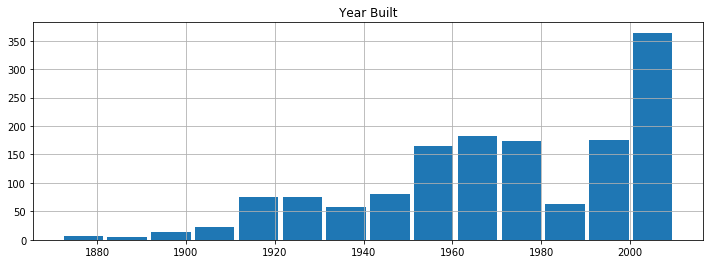

In [6]:
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Year Built')

Text(0.5, 1.0, 'Month, Year Sold')

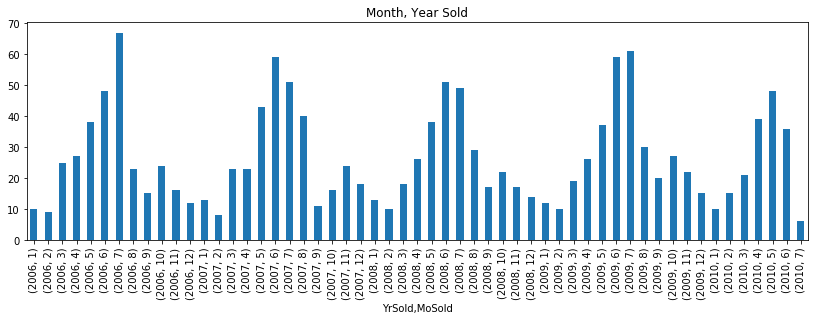

In [7]:
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('Month, Year Sold')

In [8]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

### Data

In [9]:
y_train = train['SalePrice']
X_train = train.drop(['SalePrice'], axis = 1)

In [10]:
test_id = test['Id']

In [11]:
list(data.columns[data.isnull().any()])

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SalePrice',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

#### Filling up the NAN values

In [12]:
for col_name, data_type in data.dtypes.items():
    if data_type == "int64":
        data[col_name].fillna(0, inplace=True)
    elif data_type == "float64":
        data[col_name].fillna(0.0, inplace=True)
    elif data_type == "object":
        data[col_name].fillna("empty", inplace=True)

In [13]:
for col_name, data_type in X_train.dtypes.items():
    if data_type == "int64":
        X_train[col_name].fillna(0, inplace=True)
    elif data_type == "float64":
        X_train[col_name].fillna(0.0, inplace=True)
    elif data_type == "object":
        X_train[col_name].fillna("empty", inplace=True)

Now checking the Null Values again

In [14]:
list(data.columns[data.isnull().any()])

[]

In [15]:
X_coded = pd.get_dummies(X_train)
X_coded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_coded = encoder.fit_transform(y_train)

y_coded

array([412, 339, 442, ..., 527, 199, 221], dtype=int64)

### Fitting

#### RandomForrest

In [17]:
parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [18]:
from sklearn.ensemble import RandomForestRegressor

clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_coded, y_coded)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
print("Best Model: " + str(clf.best_estimator_))
print("Best Score: " + str(clf.best_score_))

Best Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)
Best Score: 0.8808505560533224


#### Ridge

In [22]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}

In [23]:
from sklearn.linear_model import Ridge

clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, verbose=1, scoring="r2")
clf.fit(X_coded, y_coded)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'solver': ['auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [27]:
print("Best Model: " + str(clf.best_estimator_))
print("Best Score: " + str(clf.best_score_))

Best Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)
Best Score: 0.8808505560533224
